# Определение перспективного тарифа для телеком компании

<b>Цель: </b> Определить выгодный тарифный план для корректировки рекламного бюджета.<br>
<b>Выборка. </b> Данные 500 пользователей тарифных планов «Смарт» и «Ультра»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год.

***Описание тарифов***

***Тариф «Смарт»***
Ежемесячная плата: 550 рублей<br>
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика<br>

Стоимость услуг сверх тарифного пакета:<br>
минута разговора: 3 рубля<br>
сообщение: 3 рубля<br>
1 Гб интернет-трафика: 200 рублей<br>

***Тариф «Ультра»***
Ежемесячная плата: 1950 рублей<br>
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика<br>

Стоимость услуг сверх тарифного пакета:<br>
минута разговора: 1 рубль<br>
сообщение: 1 рубль<br>
1 Гб интернет-трафика: 150 рублей

***Примечание:***

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.


## Описание данных

#### Таблица users (информация о пользователях):
user_id — уникальный идентификатор пользователя<br>
first_name — имя пользователя<br>
last_name — фамилия пользователя<br>
age — возраст пользователя (годы)<br>
reg_date — дата подключения тарифа (день, месяц, год)<br>
churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)<br>
city — город проживания пользователя<br>
tariff — название тарифного плана<br>

#### Таблица calls (информация о звонках):
id — уникальный номер звонка<br>
call_date — дата звонка<br>
duration — длительность звонка в минутах<br>
user_id — идентификатор пользователя, сделавшего звонок<br>

#### Таблица messages (информация о сообщениях):
id — уникальный номер сообщения<br>
message_date — дата сообщения<br>
user_id — идентификатор пользователя, отправившего сообщение<br>

#### Таблица internet (информация об интернет-сессиях):
id — уникальный номер сессии<br>
mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)<br>
session_date — дата интернет-сессии<br>
user_id — идентификатор пользователя<br>

#### Таблица tariffs (информация о тарифах):
tariff_name — название тарифа<br>
rub_monthly_fee — ежемесячная абонентская плата в рублях<br>
minutes_included — количество минут разговора в месяц, включённых в абонентскую плату<br>
messages_included — количество сообщений в месяц, включённых в абонентскую плату<br>
mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)<br>
rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)<br>
rub_per_message — стоимость отправки сообщения сверх тарифного пакета<br>
rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np    
from scipy import stats as st
import seaborn as sns

In [2]:
users = pd.read_csv('/datasets/users.csv')
calls = pd.read_csv('/datasets/calls.csv')
messages = pd.read_csv('/datasets/messages.csv')
internet = pd.read_csv('/datasets/internet.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')

In [3]:
users.sample(15)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
81,1081,42,NaN,Москва,Софья,Терехова,2018-03-25,ultra
49,1049,41,NaN,Москва,Габриель,Ларин,2018-03-10,ultra
100,1100,58,NaN,Санкт-Петербург,Руслан,Красильников,2018-07-02,smart
268,1268,18,NaN,Москва,Трофим,Трошин,2018-05-28,smart
251,1251,48,NaN,Пермь,Роксана,Тетерина,2018-02-13,smart
407,1407,40,NaN,Челябинск,Элла,Пирогова,2018-08-14,smart
406,1406,68,NaN,Казань,Станислав,Семёнов,2018-12-15,smart
377,1377,59,NaN,Брянск,Альфред,Семин,2018-02-25,ultra
437,1437,73,NaN,Казань,Лилия,Селезнева,2018-08-03,smart
73,1073,63,NaN,Владикавказ,Гордей,Павловский,2018-10-04,smart


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [5]:
calls.head(15)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [7]:
messages.sample(15)

,id,message_date,user_id
89063,1373_75,2018-05-24,1373
112545,1453_570,2018-10-07,1453
118045,1478_397,2018-10-26,1478
59795,1262_286,2018-12-05,1262
90984,1375_784,2018-12-07,1375
54262,1241_152,2018-06-17,1241
119399,1483_334,2018-06-24,1483
869,1003_303,2018-09-18,1003
73323,1310_192,2018-11-20,1310
29619,1127_642,2018-12-12,1127


In [8]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [9]:
internet.sample(15)

,Unnamed: 0,id,mb_used,session_date,user_id
24109,24109,1082_96,0.00,2018-11-24,1082
8103,8103,1027_430,0.00,2018-05-05,1027
108140,108140,1369_169,220.27,2018-12-24,1369
104212,104212,1353_148,174.12,2018-11-05,1353
3203,3203,1011_70,191.47,2018-12-21,1011
41009,41009,1144_169,142.38,2018-06-03,1144
141968,141968,1476_170,505.95,2018-08-02,1476
33680,33680,1118_297,0.00,2018-11-28,1118
2977,2977,1010_107,0.00,2018-11-21,1010
306,306,1001_95,354.80,2018-12-23,1001


In [10]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [11]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [12]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


### Вывод

Проанализировав таблицы, обнаружила неверный тип только у дат. 
Кроме того, нам известно, что «Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. 
Так что окрулим все звонки до минут и веб-трафик до гигабайтов.


## Подготовка данных

Преобразуем даты

In [13]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     object        
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


In [14]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [15]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [16]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


Переименнуем столбец в таблице tariffs : tariff_name на tariff. Нам это понадобиться для объединения таблиц

In [17]:
tariffs = tariffs.rename(columns = {'tariff_name': 'tariff'})
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Округлим звонки до минут

In [18]:
calls['duration'] = np.ceil(calls['duration']).astype('int')
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
2,1000_2,2018-06-11,3,1000
3,1000_3,2018-09-21,14,1000
4,1000_4,2018-12-15,6,1000
5,1000_5,2018-11-02,0,1000
6,1000_6,2018-10-18,0,1000
7,1000_7,2018-08-22,19,1000
8,1000_8,2018-09-15,19,1000
9,1000_9,2018-08-15,0,1000


Требуется посчитать количество звонков и израсходованных минут по месяцам. Для этого добавить новый столбец с указанием месяца. 

Проверим за какой период у нас звонки. Для этого найдем максимум и минимум в столбце с датой.

In [19]:
display(calls['call_date'].min())
calls['call_date'].max()

Timestamp('2018-01-01 00:00:00')

Timestamp('2018-12-31 00:00:00')

Мы убедились, что все звонки были совершенны в одном году. Значит достаточно будет добавить только столбец с месяцем. С годом столбец добавлять не надо.

In [20]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,12
202603,1499_216,2018-10-18,19,1499,10
202604,1499_217,2018-11-10,11,1499,11
202605,1499_218,2018-10-06,5,1499,10


Тоже проделаем для таблицы с количеством сообщений и интернет трафика

In [21]:
display(messages['message_date'].min())
messages['message_date'].max()

Timestamp('2018-01-02 00:00:00')

Timestamp('2018-12-31 00:00:00')

In [22]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


In [23]:
display(internet['session_date'].min())
internet['session_date'].max()

Timestamp('2018-01-01 00:00:00')

Timestamp('2018-12-31 00:00:00')

In [24]:
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9
...,...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499,10
149392,149392,1499_153,490.13,2018-12-14,1499,12
149393,149393,1499_154,0.00,2018-10-27,1499,10
149394,149394,1499_155,1246.32,2018-11-26,1499,11


count    500.00000
mean      46.58800
std       16.66763
min       18.00000
25%       32.00000
50%       46.00000
75%       62.00000
max       75.00000
Name: age, dtype: float64

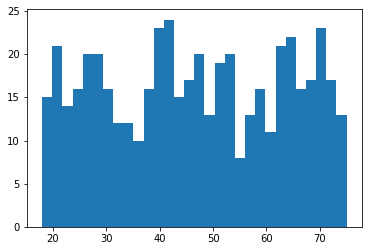

In [25]:
plt.hist(users['age'], bins=30 )
users['age'].describe()

count    202607.000000
mean          7.158198
std           5.959173
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

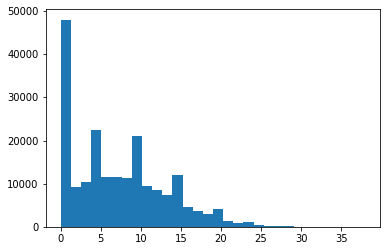

In [26]:
plt.hist(calls['duration'], bins=30)
calls['duration'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

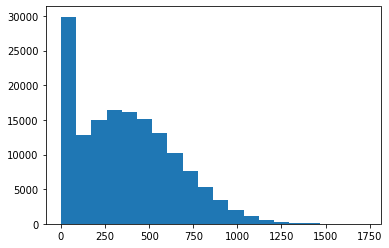

In [27]:
plt.hist(internet['mb_used'], bins=20)
internet['mb_used'].describe()

Построила гистограмму для таблицы user по столбцу age, проверила максимальное и минимальное значение. Аномального возраста нет. 
Построила гистограмму для таблицы calls по столбцу duration, проверила максимальное и минимальное значение.. Аномально длинных звонков не обнаружила.
Построила гистограмму для таблицы internet по стоблцу mb_used, проверила максимальное и минимальное значение.. Тоже аномалий не обнаружено. 

Сгруппируем звонки, сообщения и интернет трафик для каждого пользователя по месяцам. И добавим столбец с тарифом.

In [28]:
calls_count = calls.groupby(['user_id','month']).agg(calls = ('id', 'count',), duration = ('duration', 'sum')).reset_index()
calls_count

,user_id,month,calls,duration
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
...,...,...,...,...
3169,1498,10,41,247
3170,1499,9,9,70
3171,1499,10,68,449
3172,1499,11,74,612


In [29]:
messages_count = messages.groupby(['user_id','month']).agg(messages = ('id', 'count')).reset_index()
messages_count

,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [30]:
internet_count = internet.groupby(['user_id','month']).agg(mb_used = ('mb_used', 'sum')).reset_index()
internet_count['gb_used'] = np.ceil(internet_count['mb_used']/1024).astype('int')
internet_count

,user_id,month,mb_used,gb_used
0,1000,5,2253.49,3
1,1000,6,23233.77,23
2,1000,7,14003.64,14
3,1000,8,14055.93,14
4,1000,9,14568.91,15
...,...,...,...,...
3198,1498,10,20579.36,21
3199,1499,9,1845.75,2
3200,1499,10,17788.51,18
3201,1499,11,17963.31,18


In [31]:
agreg = calls_count.merge(messages_count, on = ('user_id', 'month'), how = 'outer').merge(internet_count, on = ('user_id', 'month'), how = 'outer').fillna(0)
#agreg = calls_count.join(messages_count, internet_count, on = ['user_id', 'month'])
#agreg = agreg.merge(internet_count, on = ('user_id', 'month'), how = 'outer')
agreg

,user_id,month,calls,duration,messages,mb_used,gb_used
0,1000,5,22.0,159.0,22.0,2253.49,3.0
1,1000,6,43.0,172.0,60.0,23233.77,23.0
2,1000,7,47.0,340.0,75.0,14003.64,14.0
3,1000,8,52.0,408.0,81.0,14055.93,14.0
4,1000,9,58.0,466.0,57.0,14568.91,15.0
...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.0,32.0,17206.30,17.0
3210,1489,10,0.0,0.0,21.0,19559.44,20.0
3211,1489,11,0.0,0.0,20.0,17491.56,18.0
3212,1489,12,0.0,0.0,35.0,17322.51,17.0


In [32]:
agreg = agreg.merge(users[['user_id', 'city','tariff']], on = 'user_id', how = 'left')
agreg

,user_id,month,calls,duration,messages,mb_used,gb_used,city,tariff
0,1000,5,22.0,159.0,22.0,2253.49,3.0,Краснодар,ultra
1,1000,6,43.0,172.0,60.0,23233.77,23.0,Краснодар,ultra
2,1000,7,47.0,340.0,75.0,14003.64,14.0,Краснодар,ultra
3,1000,8,52.0,408.0,81.0,14055.93,14.0,Краснодар,ultra
4,1000,9,58.0,466.0,57.0,14568.91,15.0,Краснодар,ultra
...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.0,32.0,17206.30,17.0,Санкт-Петербург,smart
3210,1489,10,0.0,0.0,21.0,19559.44,20.0,Санкт-Петербург,smart
3211,1489,11,0.0,0.0,20.0,17491.56,18.0,Санкт-Петербург,smart
3212,1489,12,0.0,0.0,35.0,17322.51,17.0,Санкт-Петербург,smart


Добавим колонки с информацией о тарифах

In [33]:
agreg_all = agreg.merge(tariffs, on = 'tariff', how = 'left')
agreg_all

,user_id,month,calls,duration,messages,mb_used,gb_used,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,22.0,159.0,22.0,2253.49,3.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,43.0,172.0,60.0,23233.77,23.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,47.0,340.0,75.0,14003.64,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,52.0,408.0,81.0,14055.93,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,58.0,466.0,57.0,14568.91,15.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.0,32.0,17206.30,17.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3210,1489,10,0.0,0.0,21.0,19559.44,20.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3211,1489,11,0.0,0.0,20.0,17491.56,18.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3
3212,1489,12,0.0,0.0,35.0,17322.51,17.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3


In [34]:
def sales(row):
    summa = row.rub_monthly_fee
    if row.duration > row.minutes_included:
        summa+= (row.duration-row.minutes_included)*row.rub_per_minute
    if row.messages > row.messages_included:
        summa+= (row.messages-row.messages_included)*row.rub_per_message
    if row.mb_used > row.mb_per_month_included:
        summa+= np.ceil((row.mb_used - row.mb_per_month_included)/1024)*row.rub_per_gb
    return round(summa,2)

In [35]:
agreg_all['sales'] = agreg_all.apply(sales, axis=1)
display(agreg_all['sales'].value_counts())
agreg_all

1950.0    905
550.0     567
950.0      87
1150.0     80
1350.0     78
         ... 
1073.0      1
888.0       1
1158.0      1
3985.0      1
3449.0      1
Name: sales, Length: 778, dtype: int64

,user_id,month,calls,duration,messages,mb_used,gb_used,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,sales
0,1000,5,22.0,159.0,22.0,2253.49,3.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6,43.0,172.0,60.0,23233.77,23.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7,47.0,340.0,75.0,14003.64,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8,52.0,408.0,81.0,14055.93,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9,58.0,466.0,57.0,14568.91,15.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1489,9,0.0,0.0,32.0,17206.30,17.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,950.0
3210,1489,10,0.0,0.0,21.0,19559.44,20.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,1550.0
3211,1489,11,0.0,0.0,20.0,17491.56,18.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,1150.0
3212,1489,12,0.0,0.0,35.0,17322.51,17.0,Санкт-Петербург,smart,50,15360,500,550,200,3,3,950.0


### Вывод 

Преобразовала все даты к верному типу, округлила звонки до минут. Проверила данные на возможные ошибки. Ошибок не обнаружила. Добавила дополнительные столбцы с указание месяца для дальнейших расчетов. Сформировала сводную таблицу и посчитала сколько платят клиенты ежемесячно с учетом лимитов по тарифам. 


## Проанализируйте данные

Опишем поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитаем среднее количество, дисперсию и стандартное отклонение. Построим гистограммы. Опишем распределения.

In [36]:
agreg_all_user_ultra = agreg_all[agreg_all['tariff']=='ultra']
display('Тариф Ультра')
agreg_all_user_ultra.describe()

'Тариф Ультра'

,user_id,month,calls,duration,messages,mb_used,gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,sales
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.0,985.0,985.0,985.0,985.0,985.0,985.0,985.000000
mean,1263.094416,8.250761,73.392893,526.623350,49.363452,19468.805208,19.494416,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,2070.152284
std,140.694908,2.871762,43.916853,317.606098,47.804457,10087.170752,9.853511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,376.187114
min,1000.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
25%,1143.000000,6.000000,41.000000,284.000000,6.000000,11770.260000,12.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
50%,1277.000000,9.000000,74.000000,518.000000,38.000000,19308.010000,19.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
75%,1381.000000,11.000000,104.000000,752.000000,79.000000,26837.690000,27.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,1950.000000
max,1495.000000,12.000000,244.000000,1673.000000,224.000000,49745.690000,49.000000,1000.0,30720.0,3000.0,1950.0,150.0,1.0,1.0,4800.000000


In [37]:
agreg_all_user_smart = agreg_all[agreg_all['tariff']=='smart']
display('Тариф Смарт')
agreg_all_user_smart.describe()

'Тариф Смарт'

,user_id,month,calls,duration,messages,mb_used,gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,sales
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.0,2229.0,2229.0,2229.0,2229.0,2229.0,2229.0,2229.000000
mean,1246.506505,8.346792,58.463437,417.934948,33.384029,16208.386990,16.328847,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1289.973531
std,146.119496,2.920316,25.939858,190.313730,28.227876,5870.476681,5.747061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,818.404367
min,1001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,550.000000
25%,1121.000000,6.000000,40.000000,282.000000,10.000000,12643.010000,13.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,550.000000
50%,1239.000000,9.000000,60.000000,422.000000,28.000000,16506.840000,17.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1023.000000
75%,1376.000000,11.000000,76.000000,545.000000,51.000000,20042.930000,20.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,1750.000000
max,1499.000000,12.000000,198.000000,1435.000000,143.000000,38552.450000,38.000000,50.0,15360.0,500.0,550.0,200.0,3.0,3.0,6770.000000


In [38]:
agreg_all.groupby('tariff').agg({'duration':['mean', 'median', np.std, np.var],
                                 'messages':['mean', 'median', np.std, np.var],
                                 'mb_used':['mean', 'median', np.std, np.var],
                                 'sales':['mean', 'median', np.std, np.var]}).T.astype('int')

tariff              smart      ultra
duration mean         417        526
         median       422        518
         std          190        317
         var        36219     100873
messages mean          33         49
         median        28         38
         std           28         47
         var          796       2285
mb_used  mean       16208      19468
         median     16506      19308
         std         5870      10087
         var     34462496  101751013
sales    mean        1289       2070
         median      1023       1950
         std          818        376
         var       669785     141516

<AxesSubplot:>

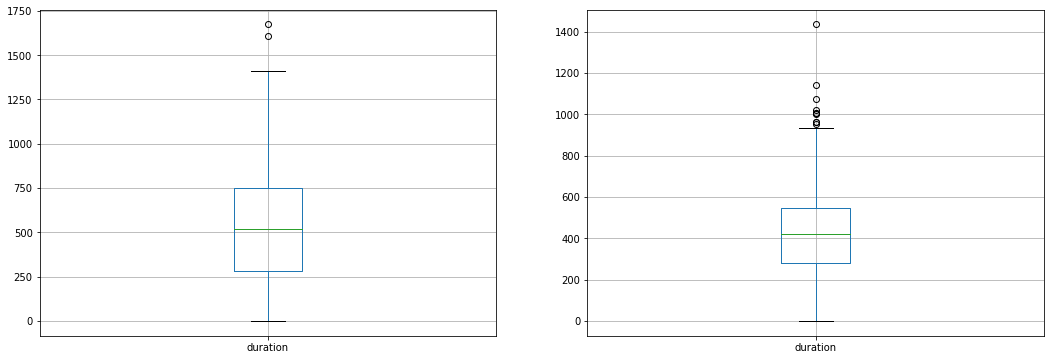

In [39]:
plt.figure(figsize = (18,6))
agreg_all_user_ultra.boxplot('duration', ax= plt.subplot(1,2,1))
agreg_all_user_smart.boxplot('duration', ax= plt.subplot(1,2,2))

<AxesSubplot:>

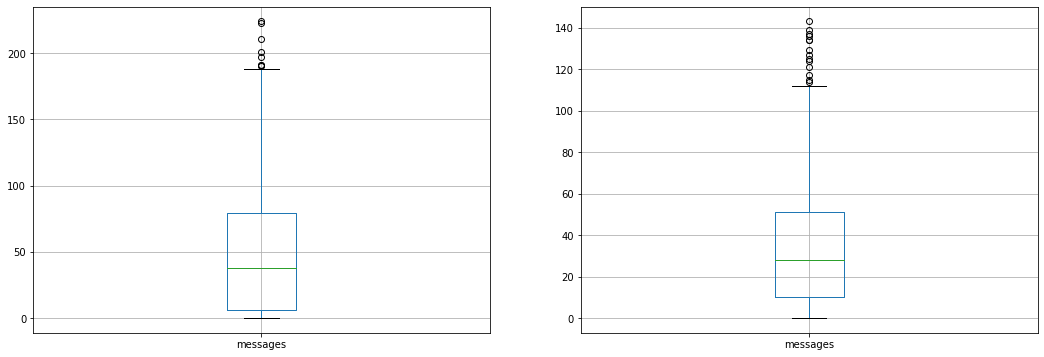

In [40]:
plt.figure(figsize = (18,6))
agreg_all_user_ultra.boxplot('messages', ax= plt.subplot(1,2,1))
agreg_all_user_smart.boxplot('messages', ax= plt.subplot(1,2,2))

<AxesSubplot:>

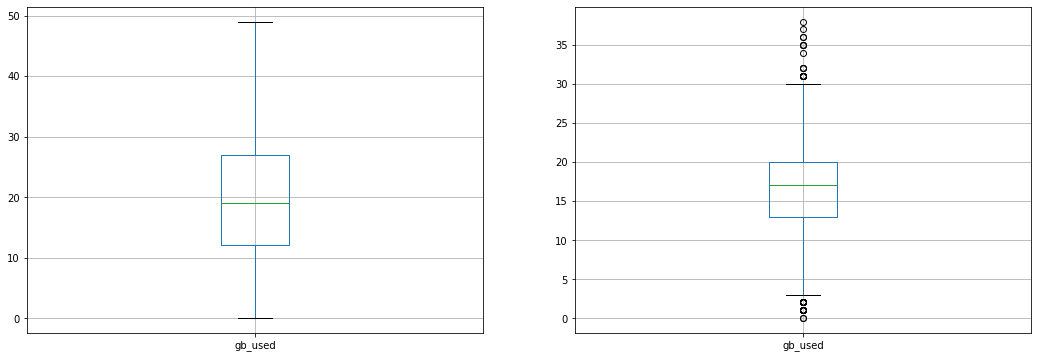

In [41]:
plt.figure(figsize = (18,6))
agreg_all_user_ultra.boxplot('gb_used', ax= plt.subplot(1,2,1))
agreg_all_user_smart.boxplot('gb_used', ax= plt.subplot(1,2,2))

<AxesSubplot:>

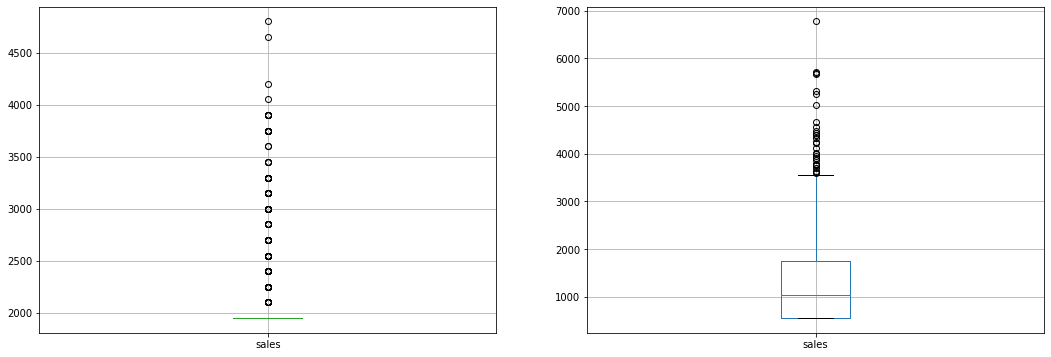

In [42]:
plt.figure(figsize = (18,6))
agreg_all_user_ultra.boxplot('sales', ax= plt.subplot(1,2,1))
agreg_all_user_smart.boxplot('sales', ax= plt.subplot(1,2,2))

In [43]:
def histogram(data_1,data_2,name, x_1,x_2):
    plt.figure(figsize=(10,6))
    plt.hist(data_1[name], bins=30, color='red', label='тариф Ультра', alpha=0.5, edgecolor='grey', )
    plt.hist(data_2[name], bins=30, color='blue', label='тариф Смарт', alpha=0.5, edgecolor='grey')
    plt.axvline(data_1[name].mean(), color='red', label='среднее Ультра',linestyle='dashed', linewidth=3)
    plt.axvline(data_2[name].mean(), color='blue', label='среднее Смарт',linestyle='dashed', linewidth=3)
    plt.axvline(x_1,color='red', label='включено в тариф Ультра', linewidth=3)
    plt.axvline(x_2,color='blue', label='включено в тариф Смарт', linewidth=3)
    plt.legend()
    

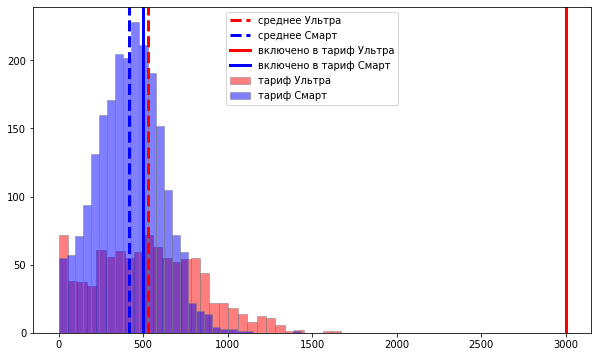

In [44]:
#agreg_all_user_ultra.hist('duration', bins=15)
#agreg_all_user_smart.hist('duration', bins=15)

histogram(agreg_all_user_ultra,agreg_all_user_smart, 'duration',3000,500)

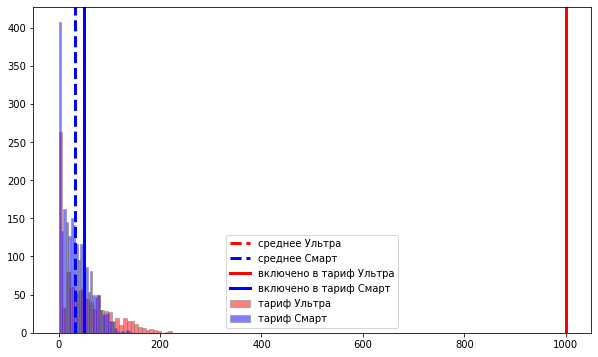

In [45]:
#agreg_all_user_ultra.hist('messages', bins=15, title='Ультра смс')
#agreg_all_user_smart.hist('messages', bins=15)

histogram(agreg_all_user_ultra,agreg_all_user_smart, 'messages',1000,50)

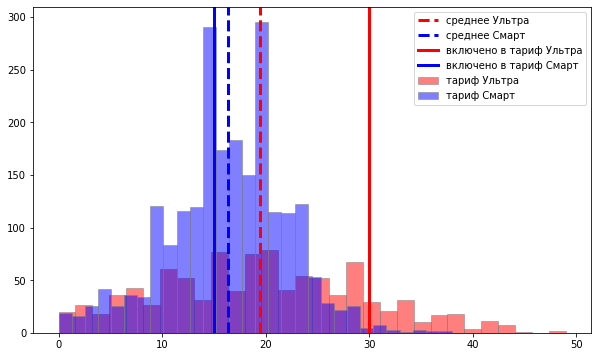

In [46]:
histogram(agreg_all_user_ultra,agreg_all_user_smart, 'gb_used',30,15)

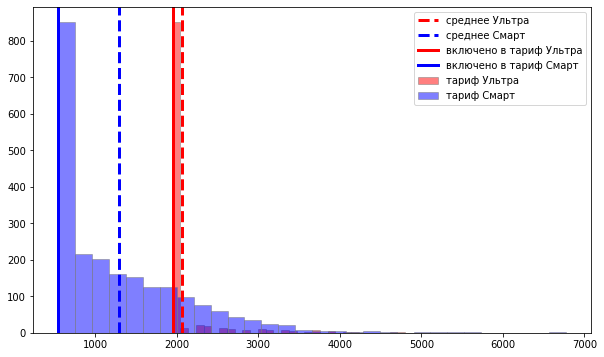

In [47]:
histogram(agreg_all_user_ultra,agreg_all_user_smart, 'sales',1950,550)

In [48]:
print('Всего пользователей на тарифе Ультра',agreg_all_user_ultra['tariff'].count())
print('Пользователи укладывающиеся в лимит на тарифе Ультра',agreg_all_user_ultra['tariff'][agreg_all_user_ultra['sales']==1950].count())
print('----------------------------------------------------')
print('Всего пользователей на тарифе Смарт',agreg_all_user_smart['tariff'].count())
print('Пользователи укладывающиеся в лимит на тарифе Смарт', agreg_all_user_smart['tariff'][agreg_all_user_smart['sales']==550].count())

Всего пользователей на тарифе Ультра 985
Пользователи укладывающиеся в лимит на тарифе Ультра 851
----------------------------------------------------
Всего пользователей на тарифе Смарт 2229
Пользователи укладывающиеся в лимит на тарифе Смарт 567


### Вывод

Сравним тарифы.

Пользователи тарифа Смарт в среднем в месяц тратят меньше минут разговора, чем пользователи тарифа Ультра.
На тарифе Смарт пользователи часто не укладываются в лимиты и доплачивают за звонки.
Дисперсия и стандартное отклонение выше на тарифе Ультра, но пользователи этого тарифа всегда укладываются в установленные лимиты. Максимальное число минут разговора в месяц значительно меньше заложенных в него 3000.

Пользователи тарифа Ультра в среднем чаще отправляют смс, чем пользователи тарифа Смарт. 
На тарифе Смарт пользовали некоторые пользователи не укладывабтся в лимит и доплачивают за дополнительные смс. На тарифе Ультра в установленный лимит укладываются все.  С дисперсией аналогичная ситуация, что и в звонках: дисперсия и стандартное отклонение выше на тарифе Ультра, но пользователи всегда укладываются в лимит.

Пользователи тарифа Ультра в среднем больше пользуются интернетом, чем пользователи тарифа Смарт.Но больше половины пользователей тарифа Смарт не укладываются в установленный лимит и доплачивабт за каждый потраченный дополнительго гб. На тарифе Ультра тоже есть пользователи, которым не хватает лимитированного интернет-трафика. Но таких пользователей значительно меньше, чем на тарифе Смарт.

Если смотреть на среднюю плату, то пользователи тарифа Смарт платят меньше на 40%. Но разрыв между медианой и средним большой, а значит есть значительное количество пользователей, которые платят больше среднего. И это заметно по дисперсии и стд отклонению: на тарифе смарт дисперсия больше почти в пять раз, а стд отклонение больше, чем в два раза. И если мы посмотрим на гистрограмму, то увидем, что на тарифе Смарт 75% пользователtq платят сверх установленного тарифа. А на тарифе Ультра около 13% пользователей, не укладываются в лимиты тарифа.


## Проверка гипотез

1. Средняя выручка пользователей Ультра и Смарта различаются.
2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

### Проверка гипотезы 1

Н0 - Средняя выручка пользователей тарифов «Ультра» и «Смарт» равны, т.е. средние значения равны.<br>
Н1 - Средняя выручка пользователей тарифов «Ультра» и «Смарт» не равны, т.е. средние значения не равны.<br>
Дисперсии выборок отличаются более чем на 5%

In [49]:
agreg_all.groupby('tariff').agg({'sales':['mean', np.std, np.var]}).T.astype('int')

tariff       smart   ultra
sales mean    1289    2070
      std      818     376
      var   669785  141516

In [50]:
alpha = .05
results = st.ttest_ind(agreg_all_user_ultra['sales'], agreg_all_user_smart['sales'], equal_var = False)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение:  4.2606313931076085e-250
Отвергаем нулевую гипотезу


#### Вывод по гипотезе 1:

Досточно маленькое p-value говорит нам о том, что вероятность случайного совпадения средних наших выборок ничтожно мало. Нулевая гипотеза отвергается.  
А значит мы принимаем альтернативную гипотезу о том, что средние наших выборок отличаются. Т.е. Средние выручки пользователей разных тарифов - разные.

### Проверка гипотезы 2

Н0 - Средняя выручка пользователей из Москвы и пользователей из других регионов равны, т.е. средние значения равны.<br>
Н1 - Средняя выручка пользователей из Москвы и пользователей из других регионов не равны, т.е. средние значения не равны.

In [51]:
alpha = .05
results = st.ttest_ind(agreg_all[agreg_all['city'] == 'Москва']['sales'], \
                       agreg_all[agreg_all['city'] != 'Москва']['sales'], equal_var = False)
print('P-value:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

P-value: 0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


#### Вывод гипотезы 2:

Значение p-value равно 0.45, это значит что вероятность того, что отличие средних значений наших выборок случайно очень большая, и мы не можем отвергнуть нулевую гипотезу.
Значит cредняя выручка пользователей из Москвы и пользователей из других регионов равны.

##  Общий вывод

Предоставленные данные были проверены на пропуски, неверный тип данных. Была обнаружена и устранена ошибка в типе дат. Согласно тарифным планам, округлили длительность звонков до минут в большую сторону. Далее данные были сгруппированы в разрезе пользователей по месяцам. И согласно тарифам, перевели мб в гб.

Сформировали сводную таблицу и посчитали траты клиентов с учетом лимитов по тарифам.

Проанализировав данные, обнаружила, что 75% пользователей тарифа Смарт платят сверх тарифа, но при этом в среднем пользователь данного тарифа все равно меньше платит на 40%, чем пользователь тарифа Ультра.


Средняя выручка по пользователям тарифа Ультра выше выручки от пользователей тарифа Смарт.
Средняя выручка пользователей из Москвы и пользователей из других регионов равны.

Для компании более выгодно продавать тариф Ультра. Но для конечной рекомендатиции выборка маловата. Возможно следут взять другую подобную выборку и провести такой же анализ. После это уже делать окончательный вывод.

